# Github link

https://github.com/zaidhabeb/machine_learning_1

#1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [368]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Display dataset information
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

#2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

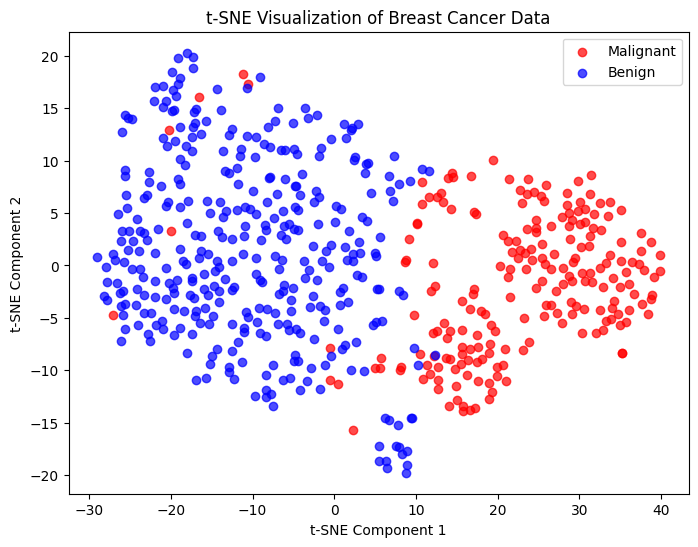

In [369]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], c='red', label='Malignant', alpha=0.7)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], c='blue', label='Benign', alpha=0.7)
plt.title("t-SNE Visualization of Breast Cancer Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

#3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [370]:
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into train and test sets
test_size = 0.2  # You can adjust this value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


#4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data;: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [371]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter values
criterion = 'entropy'            # Options: 'gini', 'entropy'
splitter = 'random'             # Options: 'best', 'random'
max_depth = 20                # Options: None, any positive integer
min_samples_split = 10       # Options: any positive integer
min_samples_leaf = 4         # Options: any positive integer

# Initialize and train the classifier
model_decision_tree = DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

model_decision_tree.fit(X_train, y_train)

print("Model trained with specified parameters.")

Model trained with specified parameters.


#5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [372]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter values
n_estimators = 280
criterion = 'gini'
max_depth = 12
min_samples_split = 50
min_samples_leaf = 40

# Initialize and train the classifier with updated parameters
model_random_forest = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

# Train the model
model_random_forest.fit(X_train, y_train)

# Print confirmation
print("Random Forest model trained with updated parameters.")


Random Forest model trained with updated parameters.


#6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [373]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define parameter values
n_estimators = 500                              # Number of boosting stages
learning_rate = 0.7                                 # Learning rate
estimator = DecisionTreeClassifier(max_depth=4)     # Base model

# Initialize and train the classifier
model_adaboost = AdaBoostClassifier(
    estimator=estimator,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    random_state=42
)

model_adaboost.fit(X_train, y_train)

print("AdaBoost model trained with specified parameters.")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost model trained with specified parameters.


#7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [374]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate each model on the test set
models = {
    "Decision Tree": model_decision_tree,
    "Random Forest": model_random_forest,
    "AdaBoost": model_adaboost
}

# Initialize a dictionary to store evaluation results
evaluation_results = {}

for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get the classification report (precision, recall, F1-score, support)
    class_report = classification_report(y_test, y_pred)

    # Get confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix
    }

    # Print results for each model
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

# Compare models based on accuracy and declare the winner
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['accuracy'])
print(f"The best model based on accuracy is: {best_model_name}")

--- Decision Tree ---
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[43  0]
 [ 2 69]]

--- Random Forest ---
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[40  3]
 [ 0 71]]

--- AdaBoost ---
Accuracy: 0.9211
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93 